# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# **Loading and Cleaning Data**

In [2]:
loanData= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GUVI Projects/Loan Prediction/train.csv")
loanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loanData.shape

(614, 13)

In [4]:
loanData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Imputing missing values
loanData['Gender'].fillna(loanData['Gender'].mode()[0],inplace=True)
loanData['Married'].fillna(loanData['Married'].mode()[0],inplace=True)
loanData['Self_Employed'].fillna(loanData['Self_Employed'].mode()[0],inplace=True)
loanData['Dependents'].fillna(loanData['Dependents'].mode()[0],inplace=True)
loanData['Credit_History'].fillna(loanData['Credit_History'].mode()[0],inplace=True)
loanData['LoanAmount'] = loanData['LoanAmount'].fillna(loanData['LoanAmount'].mean())
loanData['Loan_Amount_Term'] = loanData['Loan_Amount_Term'].fillna(loanData['Loan_Amount_Term'].mean())

In [6]:
loanData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
# Label encoding
loanData.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [8]:
loanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


# **Data Visualization**

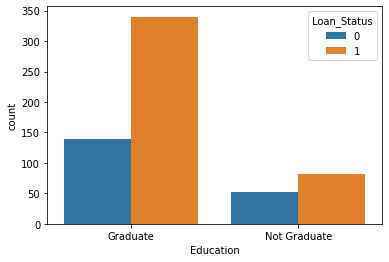

In [9]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loanData)

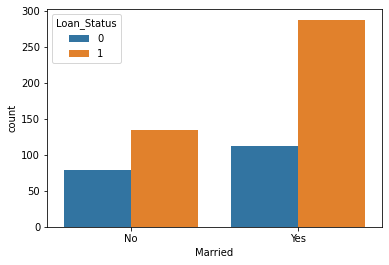

In [10]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loanData)

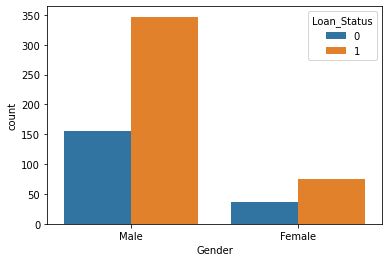

In [11]:
# Gender & Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data=loanData)

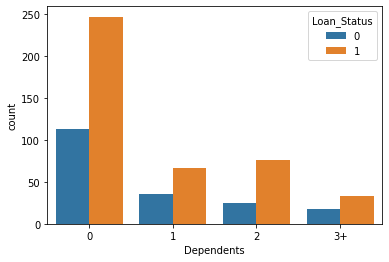

In [12]:
# Dependents & Loan Status
sns.countplot(x='Dependents',hue='Loan_Status',data=loanData)

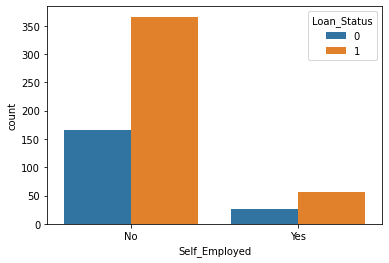

In [13]:
# Self_Employed & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loanData)

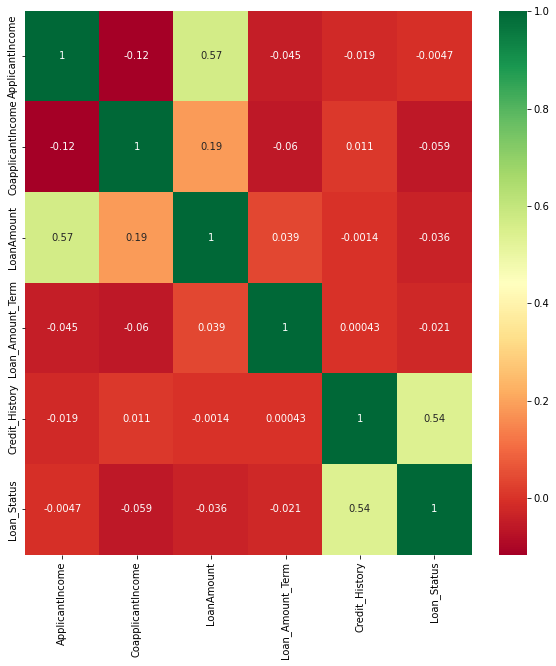

In [14]:
corrmat = loanData.corr()
corrFeatures = corrmat.index
plt.figure(figsize=(10,10))

#plotting heat map
g=sns.heatmap(loanData[corrFeatures].corr(),annot=True,cmap="RdYlGn")

In [15]:
# converting categorical values to numerical values
loanData.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Dependents':{'1':1,'2':2,'3+':3},'Self_Employed':{'No':0,'Yes':1},
                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [16]:
loanData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [17]:
loanData.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [18]:
# dropping the Loan_ID column
loanData.drop('Loan_ID', axis = 1, inplace = True)

In [19]:
loanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [20]:
# separating data and label
X = loanData.drop(columns=['Loan_Status'],axis=1)
y = loanData['Loan_Status']

In [21]:
print(X)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

## **Feature Importance**

[0.0206143  0.01913294 0.0587811  0.02095567 0.02085071 0.18116976
 0.11736992 0.18064849 0.05025762 0.28259194 0.04762755]


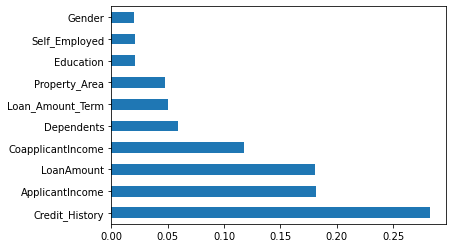

In [22]:
# Applying feature importance to find the more important data
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

#plotting graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# **Data Standardization**

In [23]:
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
print(standardized_data)

[[ 0.47234264 -1.37208932 -0.73780632 ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.27985054  0.41173269
  -1.31851281]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.27985054  0.41173269
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.25346957 ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.27985054  0.41173269
   1.22329839]
 [-2.11710719 -1.37208932 -0.73780632 ...  0.27985054 -2.42876026
  -0.04760721]]


In [24]:
X=standardized_data
y=loanData['Loan_Status']
print(X)
print(y)

[[ 0.47234264 -1.37208932 -0.73780632 ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.27985054  0.41173269
  -1.31851281]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.27985054  0.41173269
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.25346957 ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.27985054  0.41173269
   1.22329839]
 [-2.11710719 -1.37208932 -0.73780632 ...  0.27985054 -2.42876026
  -0.04760721]]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


# **Train Test Split**

In [25]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (491, 11) (123, 11)


# **Model Training**

**Logistic Regression Model**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix

In [28]:
logistic = LogisticRegression()

In [29]:
logistic.fit(X_train, y_train)
X_test_prediction1 = logistic.predict(X_test)

In [30]:
a1 = accuracy_score(X_test_prediction1,y_test)
f1 = f1_score(X_test_prediction1,y_test, average="macro")
p1 = precision_score(X_test_prediction1,y_test, average="macro")
r1 = recall_score(X_test_prediction1,y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
pd.crosstab(y_test,X_test_prediction1)

accuracy score :  0.8048780487804879
f1 score :  0.7354838709677419


col_0,0,1
Loan_Status,,
0,18,20
1,4,81


**Decision Tree Model**

In [31]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
X_test_prediction2= tree.predict(X_test)

In [32]:
a1 = accuracy_score(X_test_prediction2,y_test)
f1 = f1_score(X_test_prediction2,y_test, average="macro")
p1 = precision_score(X_test_prediction2,y_test, average="macro")
r1 = recall_score(X_test_prediction2,y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
pd.crosstab(y_test,X_test_prediction2)

accuracy score :  0.7723577235772358
f1 score :  0.7439024390243903
precision score :  0.7552631578947369
recall score :  0.7371979286536249


col_0,0,1
Loan_Status,,
0,27,11
1,17,68


**Random Forest Classifier**

In [33]:
forest=RandomForestClassifier()
forest.fit(X_train, y_train)
X_test_prediction_Rforest= forest.predict(X_test)

In [34]:
a1 = accuracy_score(X_test_prediction_Rforest,y_test)
f1 = f1_score(X_test_prediction_Rforest,y_test, average="macro")
p1 = precision_score(X_test_prediction_Rforest,y_test, average="macro")
r1 = recall_score(X_test_prediction_Rforest,y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
pd.crosstab(y_test,X_test_prediction_Rforest)

accuracy score :  0.8048780487804879
f1 score :  0.7465659340659341
precision score :  0.7278637770897833
recall score :  0.7918318794607455


col_0,0,1
Loan_Status,,
0,20,18
1,6,79


**XG Boost**

In [35]:
xgb_model=XGBClassifier()

xgb_model.fit(X_train,y_train, early_stopping_rounds=10,eval_metric="aucpr",eval_set=[(X_test,y_test)])

xgb_model.score(X_test,y_test)  


[0]	validation_0-aucpr:0.827444
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.841592
[2]	validation_0-aucpr:0.836209
[3]	validation_0-aucpr:0.837308
[4]	validation_0-aucpr:0.85761
[5]	validation_0-aucpr:0.86149
[6]	validation_0-aucpr:0.859282
[7]	validation_0-aucpr:0.861546
[8]	validation_0-aucpr:0.860466
[9]	validation_0-aucpr:0.863093
[10]	validation_0-aucpr:0.871462
[11]	validation_0-aucpr:0.860072
[12]	validation_0-aucpr:0.860955
[13]	validation_0-aucpr:0.859501
[14]	validation_0-aucpr:0.863538
[15]	validation_0-aucpr:0.863801
[16]	validation_0-aucpr:0.86726
[17]	validation_0-aucpr:0.866967
[18]	validation_0-aucpr:0.86758
[19]	validation_0-aucpr:0.866764
[20]	validation_0-aucpr:0.87031
Stopping. Best iteration:
[10]	validation_0-aucpr:0.871462



0.8048780487804879

In [36]:
y_xgbpredict=xgb_model.predict(X_test)

print(classification_report(y_test,y_xgbpredict))

print(accuracy_score(y_test,y_xgbpredict))

              precision    recall  f1-score   support

           0       0.85      0.45      0.59        38
           1       0.80      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123

0.8048780487804879


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


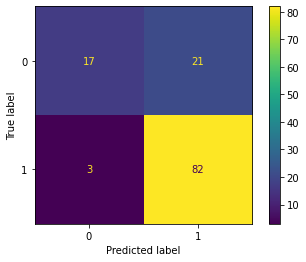

In [37]:
plot_confusion_matrix(xgb_model,X_test,y_test)

# **Saving Model**

In [40]:
import joblib
joblib.dump(xgb_model,"Loan Status Prediction.pkl")

['Loan Status Prediction.pkl']

In [41]:
model=joblib.load("Loan Status Prediction.pkl")

# **Prediction**

In [42]:
prediction_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GUVI Projects/Loan Prediction/test.csv")
prediction_df.drop('Loan_ID', axis = 1, inplace = True)
prediction_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
prediction_df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Dependents':{'1':1,'2':2,'3+':3},'Self_Employed':{'No':0,'Yes':1},
                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
prediction_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,2


In [44]:
prediction_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [45]:
prediction_df.dropna(inplace=True)
prediction_df.shape

(289, 11)

In [46]:
std_data=scaler.transform(prediction_df)
std_data

array([[ 0.47234264,  0.72881553, -0.73780632, ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.27985054,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.27985054,
         0.41173269, -1.31851281],
       [ 0.47234264, -1.37208932, -0.73780632, ..., -2.51865489,
         0.41173269, -1.31851281]])

In [47]:
result=model.predict(std_data)
print(result)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
